# Filtering the ECG

I do the following:

1. prepare the [Julia](https://julialang.org/) environment by importing the needed packages (libraries)

In [16]:
using Pkg; Pkg.activate("."); 
Pkg.precompile();
using Plots; plotlyjs()
using FFTW, DSP, CSV, Tables;

 Activating environment at `~/Documents/thesis.git/coding/01_exploration/Project.toml`
Precompiling project...


2. read in an [MITBIH](https://www.physionet.org/content/mitdb/1.0.0/) ECG file (number 100; downloaded and converted to csv using [WFDB](https://archive.physionet.org/physiotools/wfdb.shtml)). The reading of the csv file is performed by [CSV.jl](https://github.com/JuliaData/CSV.jl)

In [6]:
ecg_matrix = CSV.File("../mitbih/100.mitbih") |> Tables.matrix;

3. extract a specific ECG curve from the file (sampling frequency of the ecg is 360 per second)

In [7]:
fs = 360     # 360 samples per second
N  = 2 * fs  # equivalent to 2 seconds

ecg = ecg_matrix[1:N, 1:2];

4. create a digital filter using [DSP.jl](https://github.com/JuliaDSP/DSP.jl) and filter the ECG signal with it

In [8]:
digital_filter = digitalfilter(Lowpass(0.2), Butterworth(1))
ecg_filtered = copy(ecg)
ecg_filtered[:,2] = filt(digital_filter, ecg[:,2]);

5. create a plot of the raw and filtered ECGs to compare them (using [Plots.jl](https://github.com/JuliaPlots/Plots.jl))

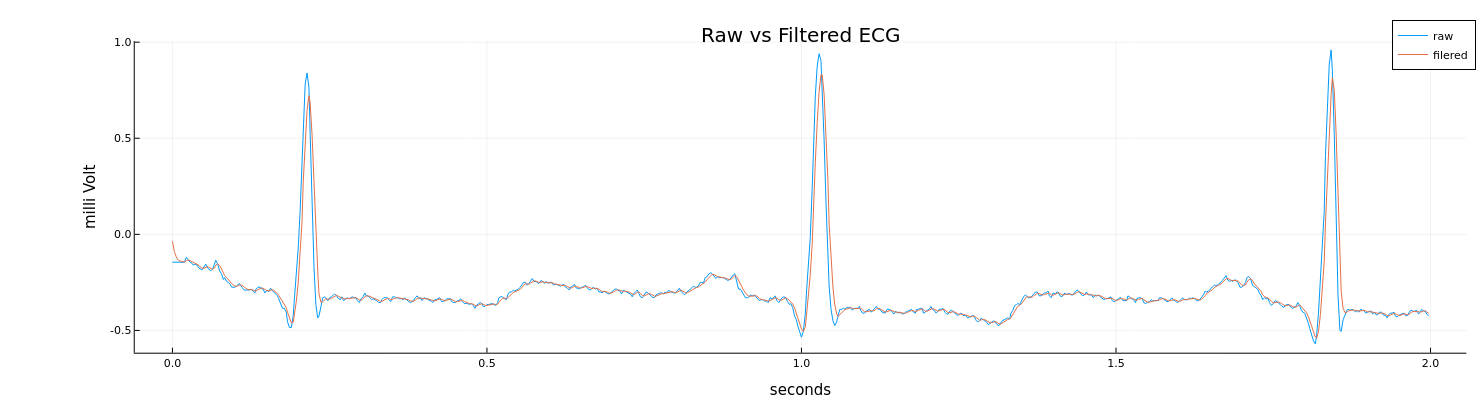

In [9]:
plot(ecg[:,1], ecg[:,2], title="Raw vs Filtered ECG", label="raw")
plot!(ecg_filtered[:,1], ecg_filtered[:,2], xlabel="seconds", ylabel="milli Volt", label="filered")

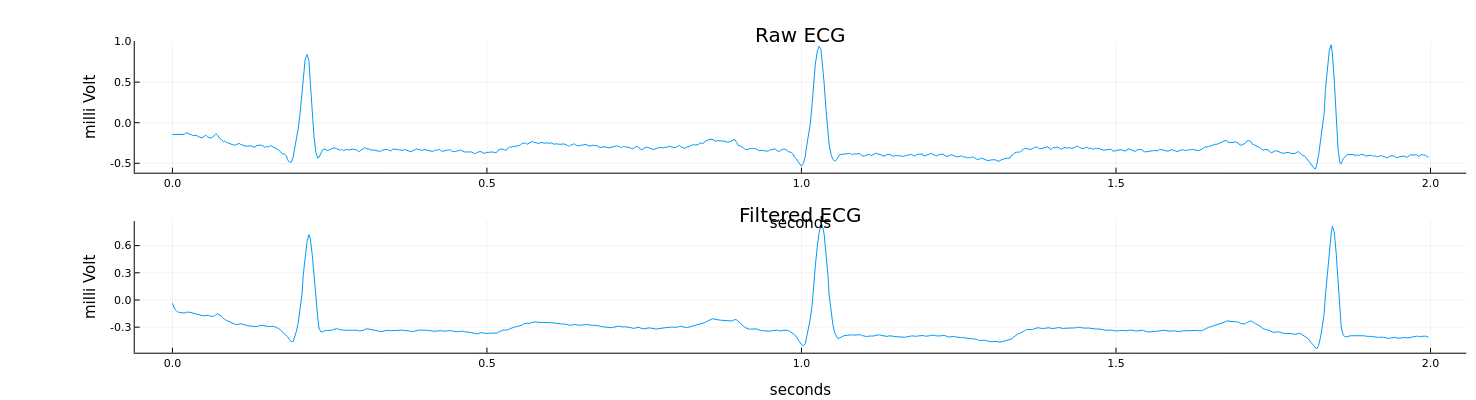

In [10]:
p1 = plot(ecg[:,1], ecg[:,2], title="Raw ECG", xlabel="seconds", ylabel="milli Volt")
p2 = plot(ecg_filtered[:,1], ecg_filtered[:,2], title="Filtered ECG", xlabel="seconds", ylabel="milli Volt")
plot(p1, p2, layout=(2,1), label="")

6. create Fourier Transforms of both ECGs using [FFTW.jl](https://github.com/JuliaMath/FFTW.jl)

In [11]:
F  = 1/N * fftshift(fft(ecg[:,2]))
F_filtered = 1/N * fftshift(fft(ecg_filtered[:,2]));

7. plot the Fourier Transforms

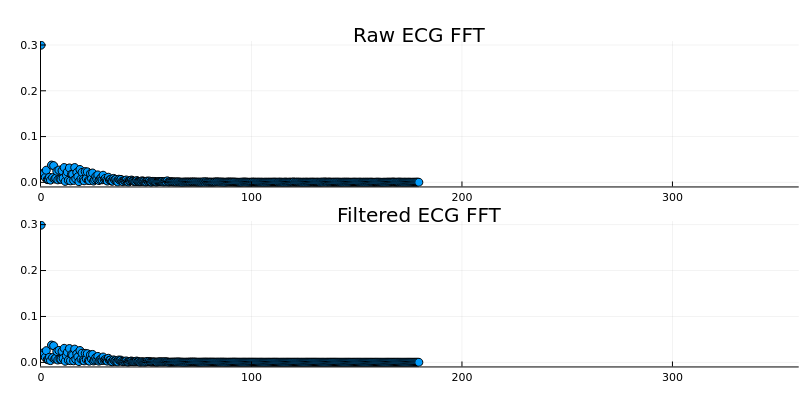

In [17]:
frequencies = ((-N/2):(N/2-1)) * fs / N

p1 = plot(frequencies, abs.(F), seriestype = :scatter, title="Raw ECG FFT", xlim=(0,360))
p2 = plot(frequencies, abs.(F_filtered), seriestype = :scatter, title="Filtered ECG FFT", xlim=(0,360))
plot(p1, p2, layout=(2,1), label="")

8. plot phase spectrums

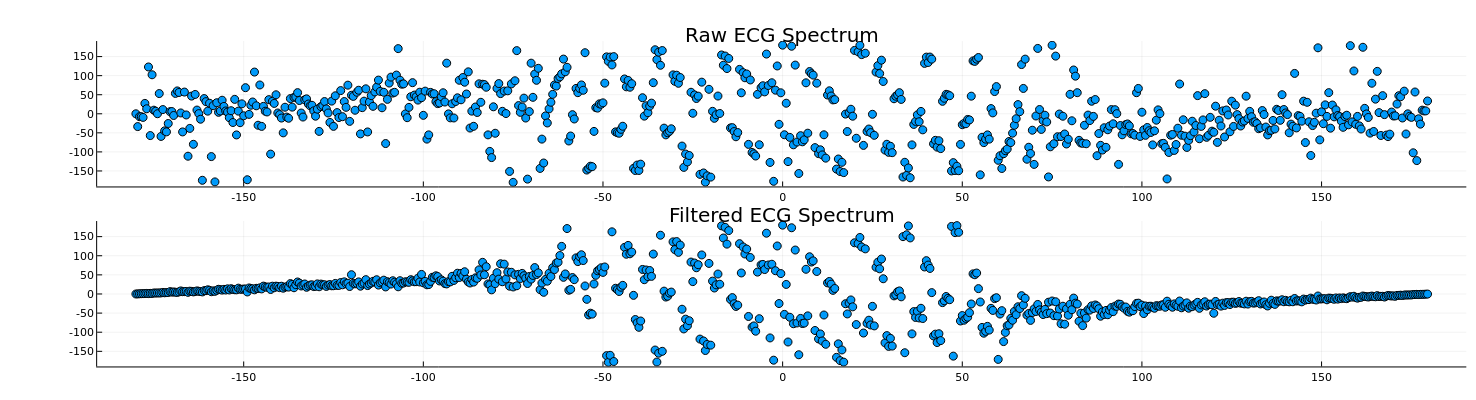

In [13]:
phase = [atan(imag(i), real(i)) for i in F] * 180 / pi
p1 = plot(frequencies, phase, seriestype = :scatter, label="", title="Raw ECG Spectrum")
phase_filtered = [atan(imag(i), real(i)) for i in F_filtered] * 180 / pi
p2 = plot(frequencies, phase_filtered, seriestype = :scatter, label="", title="Filtered ECG Spectrum")
plot(p1, p2, layout=(2,1), label="")